<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/GW%20PROJECT/ReadingInHDF5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Packages
! pip install -q bilby==2.2.2 matplotlib==3.7.3 dynesty==2.1.2 corner==2.2.2 gwpy==3.0.8 lalsuite==7.21 scipy==1.13.0 h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.1/940.1 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━

In [2]:
# Suppressing Specific Warnings
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
# Importing Important Libraries
import lal
from lal import LIGOTimeGPS
import h5py
import numpy as np
import matplotlib.pyplot as plt
import bilby
from bilby.core.prior import Uniform, PowerLaw
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters
from gwpy.timeseries import TimeSeries
import pandas as pd
import corner

In [3]:
#Reading In The File (I had to download the hdf5 file and upload it into python to be able to read it in)
f = h5py.File("/content/posterior_samples.h5", 'r')
print(f"There are these keys in the file:{list(f.keys())}")

There are these keys in the file:['history', 'online', 'version']


In [4]:
# Seperating The Seperate Keys Of The File: 'history' 'online' 'version'
hist = f['history']
onl = f['online']
ver = f['version']
print(f"The history key contains these datasets:{list(hist.keys())}")
print(f"The online key contains these datasets:{list(onl.keys())}")
print(f"The version key contains these datasets:{list(ver.keys())}")

The history key contains these datasets:['command_line', 'creator', 'gps_creation_time', 'program', 'webpage_url']
The online key contains these datasets:['approximant', 'calibration_envelope', 'config_file', 'description', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']
The version key contains these datasets:['environment', 'manager', 'packages', 'pesummary']


In [5]:
# Defining Some Key Datasets Within The Data (Only the posterior one is important for this)
creation_time = hist['gps_creation_time']
approximant = onl['approximant']
posterior = onl['posterior_samples']
prior = onl['priors']

In [6]:
# Opening The Posterior Samples Dataset
print(posterior.dtype.names)
samples=pd.DataFrame.from_records(np.array(posterior))
samples

('H1_log_likelihood', 'H1_matched_filter_snr', 'H1_optimal_snr', 'H1_time', 'L1_log_likelihood', 'L1_matched_filter_snr', 'L1_optimal_snr', 'V1_log_likelihood', 'V1_matched_filter_snr', 'V1_optimal_snr', 'a_1', 'a_2', 'azimuth', 'chi_1_in_plane', 'chi_2_in_plane', 'chi_eff', 'chi_p', 'chirp_mass', 'chirp_mass_source', 'comoving_distance', 'cos_tilt_1', 'cos_tilt_2', 'dec', 'geocent_time', 'iota', 'log_likelihood', 'log_prior', 'luminosity_distance', 'mass_1', 'mass_1_source', 'mass_2', 'mass_2_source', 'mass_ratio', 'phase', 'phi_1', 'phi_12', 'phi_2', 'phi_jl', 'psi', 'ra', 'recalib_H1_amplitude_0', 'recalib_H1_amplitude_1', 'recalib_H1_amplitude_2', 'recalib_H1_amplitude_3', 'recalib_H1_amplitude_4', 'recalib_H1_amplitude_5', 'recalib_H1_amplitude_6', 'recalib_H1_amplitude_7', 'recalib_H1_amplitude_8', 'recalib_H1_amplitude_9', 'recalib_H1_frequency_0', 'recalib_H1_frequency_1', 'recalib_H1_frequency_2', 'recalib_H1_frequency_3', 'recalib_H1_frequency_4', 'recalib_H1_frequency_5', 'r

,H1_log_likelihood,H1_matched_filter_snr,H1_optimal_snr,H1_time,L1_log_likelihood,L1_matched_filter_snr,L1_optimal_snr,V1_log_likelihood,V1_matched_filter_snr,V1_optimal_snr,...,network_optimal_snr,network_matched_filter_snr,network_21_multipole_snr,network_33_multipole_snr,network_44_multipole_snr,network_precessing_snr,cos_theta_jn,viewing_angle,cos_iota,redshift
0,24.934429,7.472619,7.825842,1.416532e+09,26.553875,7.711809,7.332955,-0.682657,-0.290305,2.760557,...,11.074146,10.314879,0.528385,2.149509,0.905284,0.417837,-0.617551,0.905171,-0.672999,0.502412
1,23.802547,7.342622,8.182176,1.416532e+09,24.224536,7.447328,6.851283,0.283027,0.934506,2.407513,...,10.940027,10.361236,0.884034,2.473257,0.606111,2.848736,-0.554654,0.982849,-0.864417,0.433086
2,21.149628,6.971131,6.033678,1.416532e+09,28.894074,8.032028,6.775593,-0.119989,0.450070,2.541656,...,9.421992,10.361633,0.249848,0.352029,1.213968,0.075839,-0.257476,1.310387,-0.263865,0.520320
3,21.944972,7.028191,7.976099,1.416532e+09,28.152495,7.932012,7.004572,-0.275374,-0.155634,1.465641,...,10.715890,10.394825,0.452665,1.985189,1.621478,1.284790,-0.097732,1.472908,-0.231913,0.511132
4,23.082920,7.106745,7.035145,1.416532e+09,25.158752,7.392319,7.620904,1.058897,1.987824,0.960296,...,10.416026,10.391874,0.291991,0.699379,0.722502,0.461153,0.706478,0.786287,0.633632,0.811252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,27.722292,7.859125,9.010893,1.416532e+09,35.379656,8.811115,9.271881,1.246005,2.141925,2.155916,...,13.107706,11.987694,0.093637,0.286462,1.480758,2.359675,0.552676,0.985225,0.766197,0.438916
9254,27.494131,7.752343,8.463412,1.416532e+09,34.154723,8.594360,8.723986,3.144676,3.134793,2.200127,...,12.352240,11.939964,0.108628,1.141468,0.948789,1.296004,0.551629,0.986481,0.762449,0.628587
9255,26.187126,7.648260,8.297609,1.416532e+09,35.428947,8.814486,8.521513,2.428427,2.824128,2.720357,...,12.201099,11.987253,0.048102,1.199526,0.950858,1.786283,0.607038,0.918468,0.842358,0.475941
9256,26.429229,7.701494,7.985303,1.416532e+09,35.258508,8.798670,8.768081,2.660631,2.852358,3.406522,...,12.338910,12.023982,0.138129,2.066231,1.042259,2.342929,0.560459,0.975856,0.837662,0.456559


Mc = 79.04968431867142 with a 90% C.I = 70.56998895373502 -> 87.2416472367872


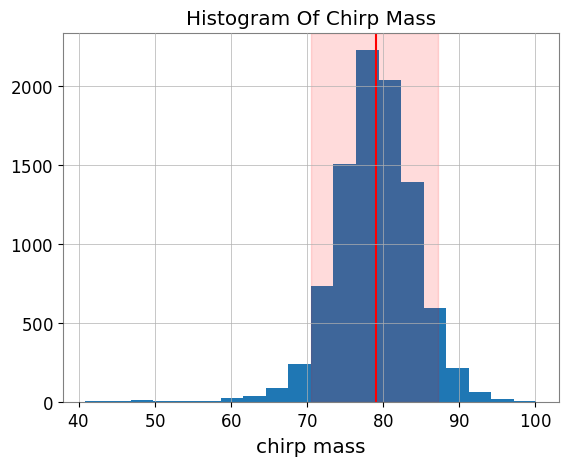

In [7]:
# Chirp Mass
Mc = posterior["chirp_mass"]
lower_bound = np.quantile(Mc, 0.05)
upper_bound = np.quantile(Mc, 0.95)
median = np.quantile(Mc, 0.5)
print("Mc = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))

fig, ax = plt.subplots()
ax.hist(posterior["chirp_mass"], bins=20)
ax.axvspan(lower_bound, upper_bound, color='red', alpha=0.14)
ax.axvline(median, color='red')
ax.set_xlabel("chirp mass")
ax.set_title("Histogram Of Chirp Mass")
plt.show()

Chi = 0.08173425745988683 with a 90% C.I = -0.1657278735499107 -> 0.317969069813185


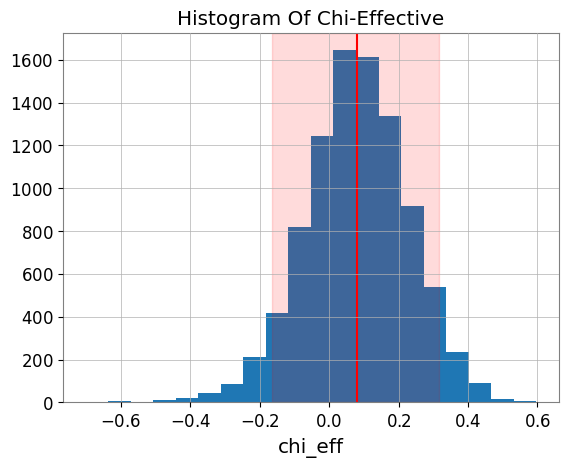

In [8]:
# Chi_Effective Mass
Chi = posterior["chi_eff"]
lower_bound = np.quantile(Chi, 0.05)
upper_bound = np.quantile(Chi, 0.95)
median = np.quantile(Chi, 0.5)
print("Chi = {} with a 90% C.I = {} -> {}".format(median, lower_bound, upper_bound))

fig, ax = plt.subplots()
ax.hist(posterior["chi_eff"], bins=20)
ax.axvspan(lower_bound, upper_bound, color='red', alpha=0.14)
ax.axvline(median, color='red')
ax.set_xlabel("chi_eff")
ax.set_title("Histogram Of Chi-Effective")
plt.show()

https://ldas-jobs.ligo.caltech.edu/~pe.o4/O4b//S241101ee/online/summary/html/online_online_chirp_mass.html

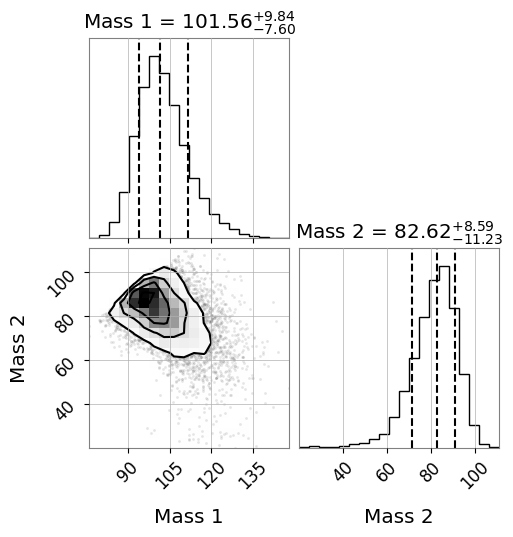

In [9]:
import corner
samples = np.array([posterior["mass_1"], posterior["mass_2"]]).T
fig = corner.corner(samples, bins=20, labels=["Mass 1", "Mass 2"], show_titles=True, quantiles=[0.16, 0.5, 0.84],)